In [57]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
%matplotlib inline

import biff
from pygadgetreader import *
from octopus import profiles
from octopus import orbit_cm
from astropy import constants
from astropy import units as u

from octopus import profiles

In [66]:
font = {'size':16, 'family':'serif'}
plt.matplotlib.rc('font', **font)

In [3]:
G_c = constants.G
G_c = G_c.to(u.kiloparsec**3 / (u.s**2 * u.Msun)) # 
print G_c

4.51835939627e-39 kpc3 / (s2 solMass)


# To-do
1. Check 1.4 factor in the potential!
2. Play with more coefficients in $n, l, m$
3. Make 2d plots
4. Compare the value of the potential at a given positions

## To take into account:
1. The mass of the MW
2. The scale length
3. The potential units.

In [10]:
# Simulated data:

MW = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'pos', 'dm')
MW_mass = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'mass', 'dm')
MW_pot = readsnap('../data/MW_models/pm/MWN2vir_000.hdf5', 'pot', 'dm')

MWLMCi = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pos', 'dm')
MWLMCi_mass = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'mass', 'dm')
MWLMCi_pot = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pot', 'dm')

MWLMCf = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pos', 'dm')
MWLMCf_vel = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'vel', 'dm')
MWLMCf_pid = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pid', 'dm')
MWLMCf_mass = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'mass', 'dm')
MWLMCf_pot = readsnap('../data/LMCMW/MWmLMC6/H1/MWfLMC6H1_119.hdf5', 'pot', 'dm')




Returning DM    Positions
Returning DM    Mass
Returning DM    Potential
Returning DM    Positions
Returning DM    Mass
Returning DM    Potential
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Mass
Returning DM    Potential


In [11]:
xmw_cm = 3.14213492468
ymw_cm = 33.1085245965
zmw_cm = -10.5106429199

In [12]:
MWLMCf[:,0] = MWLMCf[:,0] - xmw_cm
MWLMCf[:,1] = MWLMCf[:,1] - ymw_cm
MWLMCf[:,2] = MWLMCf[:,2] - zmw_cm

In [13]:
# Truncating the halo at 500kpc
trunc1 = np.where(np.sqrt((MW[:,0])**2.0 + (MW[:,1])**2.0 + (MW[:,2])**2.0)<500)[0]
trunc2 = np.where(np.sqrt((MWLMCi[:,0])**2.0 + (MWLMCi[:,1])**2.0 + (MWLMCi[:,2])**2.0)<500)[0]
trunc3 = np.where(np.sqrt((MWLMCf[:,0])**2.0 + (MWLMCf[:,1])**2.0 + (MWLMCf[:,2])**2.0)<500)[0]

In [14]:
MW_t = MW[trunc1]
MW_mass_t = MW_mass[trunc1]
MW_pot_t = MW_pot[trunc1]


MWLMCi_t = MWLMCi[trunc2]
MWLMCi_mass_t = MWLMCi_mass[trunc2]
MWLMCi_pot_t = MWLMCi_pot[trunc2]


MWLMCf_t = MWLMCf[trunc3]
MWLMCf_mass_t = MWLMCf_mass[trunc3]
MWLMCf_pot_t = MWLMCf_pot[trunc3]


In [9]:
# Function to write the coefficients.
def writting_coeff(name, S, T):
    f = open(name, 'w')
    f.write("# S    T \n")
    S1d = np.reshape(S, (np.size(S),1))
    T1d = np.reshape(T, (np.size(T),1))
    for i in range(len(S1d)):
        f.write("%f %f \n"%(S1d[i][0], T1d[i][0]))
    f.close

In [19]:
MWLMCf_pot1d = np.reshape(MWLMCf_pot, (len(MWLMCf_pot), 1))

In [14]:
print type(MWLMCf_pot1d)
len(MWLMCf_pot_t)

<type 'numpy.ndarray'>


1313407

<matplotlib.colorbar.Colorbar instance at 0x7fe10ee1e4d0>

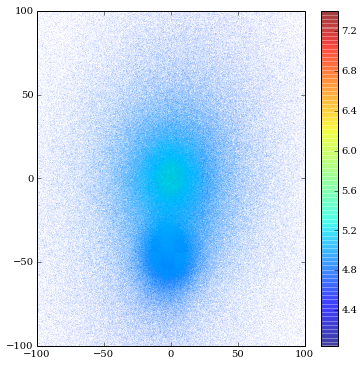

In [24]:
plt.figure(figsize=(6,6))
plt.scatter(MWLMCf[:,0], MWLMCf[:,1], s=0.1, edgecolors='none', c=np.log10(np.abs(MWLMCf_pot1d)), alpha=0.5)
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.colorbar()

In [77]:
def STnlm(xyz, mass, rs, n_max, l_max):
    nmax = n_max
    lmax = l_max

    Snlm = np.zeros((nmax+1,lmax+1,lmax+1))
    Tnlm = np.zeros((nmax+1,lmax+1,lmax+1))

    nlms = []

    for n in range(nmax+1):
        for l in range(lmax+1):
            for m in range(l+1):
                nlms.append([n,l,m])

    for nlm in nlms:
        n,l,m = nlm
        S,T = biff.compute_coeffs_discrete(np.double(xyz), np.double(mass/100.0), nlm, rs)
        Snlm[n,l,m] = S
        Tnlm[n,l,m] = T
    return Snlm, Tnlm, nlms

# MW isolated halo (Hernquist)

In [92]:
r_MW_t = np.sqrt(MW_t[:,0]**2.0 + MW_t[:,1]**2.0 + MW_t[:,2]**2.0)
rho_teo = profiles.dens_hernquist(40.85, r_MW_t, 1.55E12) 

In [97]:
## MW isolated halo 1 term in N

SMW1, TMW1, nlmsMW1 = STnlm(MW_t, MW_mass_t, 40.3, 1, 0)
MWbfe_pot = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW1, TMW1, 1, 0, G_c.value, 1.55E12, 40.85)
MWbfe_rho = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW1, TMW1, 1, 0, 1.55E12, 40.85)


In [111]:
## MW isolated halo 10 term in N

SMW2, TMW2, nlmsMW2 = STnlm(MW_t, MW_mass_t, 40.3, 10, 0)
MWbfe_pot2 = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW2, TMW2, 10, 0, G_c.value, 1.55E12, 40.85)
MWbfe_rho2 = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW2, TMW2, 10, 0, 1.55E12, 40.85)

In [113]:
## MW isolated halo 20 term in N

SMW3, TMW3, nlmsMW3 = STnlm(MW_t, MW_mass_t, 40.3, 20, 0)
MWbfe_pot3 = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW3, TMW3, 20, 0, 1, 1.55E12, 40.85)
MWbfe_rho3 = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW3, TMW3, 20, 0, 1.55E12, 40.85)

In [80]:
## MW isolated halo 5 term in Nmax and 5 in lmax

SMW4, TMW4, nlmsMW4 = STnlm(MW_t, MW_mass_t, 40.3, 5, 5)
MWbfe_pot4 = biff.potential(np.ascontiguousarray(np.double(MW_t)), SMW4, TMW4, 5, 5, 1, 1.35E12, 40.85)
MWbfe_rho4 = biff.density(np.ascontiguousarray(np.double(MW_t)), SMW4, TMW4, 5, 5, 1.35E12, 40.85)

In [106]:
r = np.linspace(0.1, 500, 1000)
hernpot = profiles.pot_hernquist(40.85, r, 1.55E12)



In [56]:
pot_factor = G_c/43007.1*1E10 

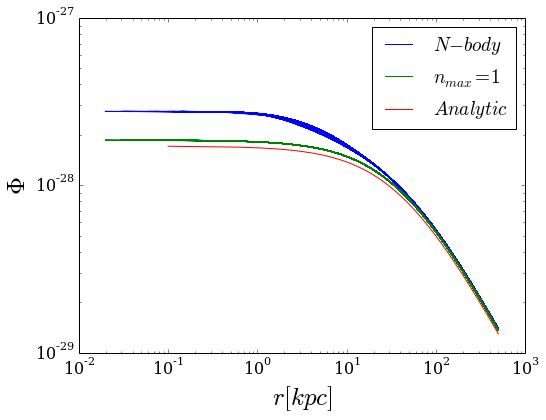

In [114]:
plt.figure(figsize=(8,6))
plt.loglog(r_MW_t, np.abs(MW_pot_t)*pot_factor, label='$N-body$')
plt.loglog(r_MW_t, np.abs(MWbfe_pot)/1.45, label='$n_{max} = 1$')
#plt.loglog(r_MW_t, np.abs(MWbfe_pot2), label='$n_{max} = 10$')
plt.loglog(r, np.abs(hernpot), label='$Analytic$')
plt.legend()
plt.xlabel(r'$r[kpc]$', fontsize=25)
plt.ylabel(r'$\Phi$', fontsize=25)

In [99]:
residuals1 = np.zeros((len(r_MW_t), 2))
residuals2 = np.zeros((len(r_MW_t), 2))
residuals3 = np.zeros((len(r_MW_t), 2))
residuals4 = np.zeros((len(r_MW_t), 2))

residuals1[:,0] = r_MW_t
residuals2[:,0] = r_MW_t
residuals3[:,0] = r_MW_t
residuals4[:,0] = r_MW_t

residuals1[:,1] = (MWbfe_rho - (rho_teo*factor))/rho_teo*factor
residuals2[:,1] = (MWbfe_rho2 - (rho_teo*factor))/rho_teo*factor
residuals3[:,1] = (MWbfe_rho3 - (rho_teo*factor))/rho_teo*factor
residuals4[:,1] = (MWbfe_rho4 - (rho_teo*factor))/rho_teo*factor

res_sorted1 = np.sort(residuals1, axis=0)
res_sorted2 = np.sort(residuals2, axis=0)
res_sorted3 = np.sort(residuals3, axis=0)
res_sorted4 = np.sort(residuals4, axis=0)



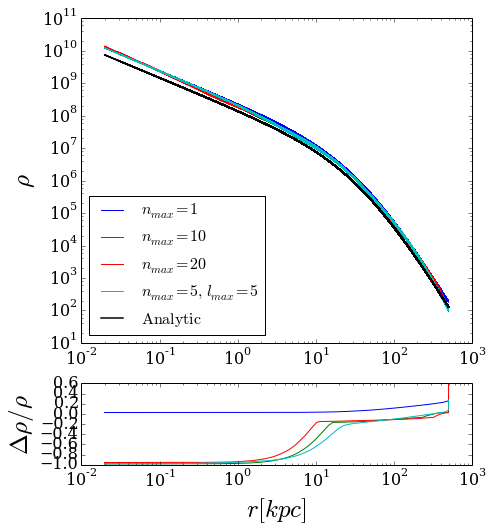

In [100]:
factor=1.45
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=[14, 8])
gs = gridspec.GridSpec(2, 1, width_ratios=[1,1], height_ratios=[4,1])

ax1 = plt.subplot(gs[0])
ax1.loglog(r_MW_t, MWbfe_rho, label='$n_{max} = 1$')
ax1.loglog(r_MW_t, MWbfe_rho2, label='$n_{max} = 10$')
ax1.loglog(r_MW_t, MWbfe_rho3, label='$n_{max} = 20$')
ax1.loglog(r_MW_t, MWbfe_rho4, label='$n_{max} = 5,\ l_{max}=5$')
ax1.loglog(r_MW_t, rho_teo, label='$\mathrm{Analytic}$', lw=1.5, c='k')
ax1.legend(fontsize=16, loc='best')
ax1.set_ylabel(r'$\rho$', fontsize=25)

ax2 = plt.subplot(gs[1])
ax2.semilogx(res_sorted1[:,0], res_sorted1[:,1])
ax2.semilogx(res_sorted2[:,0], res_sorted2[:,1])
ax2.semilogx(res_sorted3[:,0], res_sorted3[:,1])
ax2.semilogx(res_sorted4[:,0], res_sorted4[:,1])
ax2.set_xlabel(r'$r[kpc]$', fontsize=25)
ax2.set_ylabel(r'$\Delta \rho / \rho$', fontsize=25)

#plt.savefig('rho_MW.eps', dpi=300)

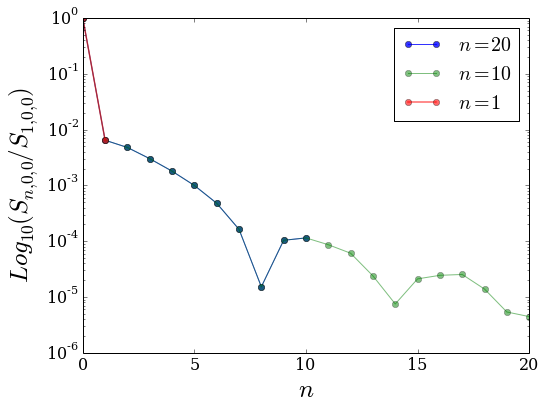

In [314]:
plt.figure(figsize=(8,6))
plt.semilogy(np.array(nlmsMW2)[:,0], np.abs(SMW2.flat/SMW2[0,0,0])[:], marker='o', c='b', alpha=0.8, label='$n=20$')
plt.semilogy(np.array(nlmsMW3)[:,0], np.abs(SMW3.flat/SMW3[0,0,0])[:], marker='o', c='g', alpha=0.5, label='$n=10$')
plt.semilogy(np.array(nlmsMW1)[:,0], np.abs(SMW1.flat/SMW1[0,0,0])[:], marker='o', c='r', lw=1.5, alpha=0.6, label='$n=1$')
plt.xlabel(r'$n$', fontsize=25)
plt.ylabel(r'$Log_{10}(S_{n,0,0}/S_{1,0,0})$', fontsize=25)
plt.legend(loc='best', fontsize=20)
plt.savefig("Snlm_MW.eps", dpi=300)
#plt.xlim(0,30)
#plt.ylim(1E-6, 1.0)

# MW + LMC initial state

In [17]:
SMWLMCi1, TMWLMCi1, nlmsMWLMCi1 = STnlm(MWLMCi_t, MWLMCi_mass_t, 40.3, 1, 0)

MWLMCbfe_pot = biff.potential(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi1, TMWLMCi1, 1, 0, 1, 1.35E12, 40.85)
MWLMCbfe_rho = biff.density(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi1, TMWLMCi1, 1, 0, 1.35E12, 40.85)

In [18]:
SMWLMCi2, TMWLMCi2, nlmsMWLMCi2 = STnlm(MWLMCi_t, MWLMCi_mass_t, 40.3, 10, 0)

MWLMCbfe_pot2 = biff.potential(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi2, TMWLMCi2, 10, 0, 1, 1.35E12, 40.85)
MWLMCbfe_rho2 = biff.density(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi2, TMWLMCi2, 10, 0, 1.35E12, 40.85)

In [19]:
SMWLMCi3, TMWLMCi3, nlmsMWLMCi3 = STnlm(MWLMCi_t, MWLMCi_mass_t, 40.3, 20, 0)

MWLMCbfe_pot3 = biff.potential(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi3, TMWLMCi3, 20, 0, 1, 1.35E12, 40.85)
MWLMCbfe_rho3 = biff.density(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi3, TMWLMCi3, 20, 0, 1.35E12, 40.85)

In [20]:
r_MWLMCi_t = np.sqrt(MWLMCi_t[:,0]**2.0 + MWLMCi_t[:,1]**2.0 + MWLMCi_t[:,2]**2.0)


In [21]:
SMWLMCi4, TMWLMCi4, nlmsMWLMCi4 = STnlm(MWLMCi_t, MWLMCi_mass_t, 40.3, 5, 5)



In [22]:
MWLMCbfe_pot4 = biff.potential(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi4, TMWLMCi4, 5, 5, 1, 1.35E12, 40.85)
#MWLMCbfe_rho4 = biff.density(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi4, TMWLMCi4, 20, 5, 1.35E12, 40.85)

In [23]:
SMWLMCi5, TMWLMCi5, nlmsMWLMCi5 = STnlm(MWLMCi_t, MWLMCi_mass_t, 40.3, 10, 10)
MWLMCbfe_pot5 = biff.potential(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi5, TMWLMCi5, 10, 10, 1, 1.35E12, 40.85)


In [26]:
SMWLMCi6, TMWLMCi6, nlmsMWLMCi6 = STnlm(MWLMCi_t, MWLMCi_mass_t, 40.3, 20, 20)
MWLMCbfe_pot6 = biff.potential(np.ascontiguousarray(np.double(MWLMCi_t)), SMWLMCi6, TMWLMCi6, 20, 20, 1, 1.35E12, 40.85)


In [131]:
x = np.reshape(SMWLMCi4, (np.size(SMWLMCi4),1))
x[20][0]

-0.052412128421399501

In [138]:
writting_coeff('MWLMC1-n1', SMWLMCi1, TMWLMCi1)
writting_coeff('MWLMC1-n10', SMWLMCi2, TMWLMCi2)
writting_coeff('MWLMC1-n20', SMWLMCi3, TMWLMCi3)
writting_coeff('MWLMC1-n5-l5', SMWLMCi4, TMWLMCi4)
writting_coeff('MWLMC1-n10-l10', SMWLMCi5, TMWLMCi5)
writting_coeff('MWLMC1-n20-l20', SMWLMCi6, TMWLMCi6)

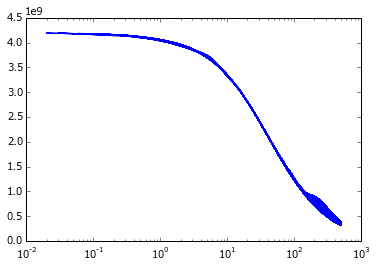

In [37]:
#plt.semilogx(r_MWLMCi_t, np.abs(MWLMCi_pot_t))
plt.semilogx(r_MWLMCi_t, np.abs(MWLMCbfe_pot4))

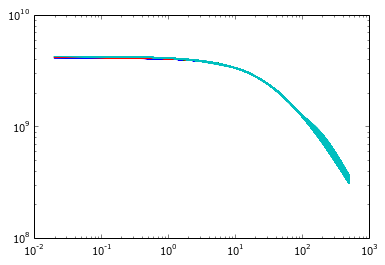

In [25]:
plt.loglog(r_MWLMCi_t, np.abs(MWLMCbfe_pot))
plt.loglog(r_MWLMCi_t, np.abs(MWLMCbfe_pot2))
plt.loglog(r_MWLMCi_t, np.abs(MWLMCbfe_pot3))
plt.loglog(r_MWLMCi_t, np.abs(MWLMCbfe_pot4))

In [ ]:
plt.figure(figsize=(8,6))
plt.loglog(r_MW_t, MWbfe_rho, label='$n_{max} = 1$')
plt.loglog(r_MW_t, MWbfe_rho2, label='$n_{max} = 10$')
plt.loglog(r_MW_t, MWbfe_rho3, label='$n_{max} = 20$')
plt.loglog(r_MW_t, rho_teo, label='$Theoretical$', lw=1.5, c='k')
plt.legend(fontsize=16, loc='best')
plt.xlabel(r'$r$', fontsize=25)
plt.ylabel(r'$\rho$', fontsize=25)

# MW + LMC final state

In [227]:
SMWLMCf1, TMWLMCf1, nlmsMWLMCf1 = STnlm(MWLMCf_t, MWLMCf_mass_t, 40.3, 1, 0)

MWLMCbfe_pot_f = biff.potential(np.ascontiguousarray(np.double(MWLMCf_t)), SMWLMCf1, TMWLMCf1, 1, 0, 1, 1.35E12, 40.85)
MWLMCbfe_rho_f = biff.density(np.ascontiguousarray(np.double(MWLMCf_t)), SMWLMCf1, TMWLMCf1, 1, 0, 1.35E12, 40.85)

In [228]:
SMWLMCf2, TMWLMCf2, nlmsMWLMCf2 = STnlm(MWLMCf_t, MWLMCf_mass_t, 40.3, 10, 0)

MWLMCbfe_pot_f2 = biff.potential(np.ascontiguousarray(np.double(MWLMCf_t)), SMWLMCf2, TMWLMCf2, 10, 0, 1, 1.35E12, 40.85)
MWLMCbfe_rho_f2 = biff.density(np.ascontiguousarray(np.double(MWLMCf_t)), SMWLMCf2, TMWLMCf2, 10, 0, 1.35E12, 40.85)

In [229]:
SMWLMCf3, TMWLMCf3, nlmsMWLMCf3 = STnlm(MWLMCf_t, MWLMCf_mass_t, 40.3, 20, 0)

MWLMCbfe_pot_f3 = biff.potential(np.ascontiguousarray(np.double(MWLMCf_t)), SMWLMCf3, TMWLMCf3, 20, 0, 1, 1.35E12, 40.85)
MWLMCbfe_rho_f3 = biff.density(np.ascontiguousarray(np.double(MWLMCf_t)), SMWLMCf3, TMWLMCf3, 20, 0, 1.35E12, 40.85)

In [230]:
SMWLMCf4, TMWLMCf4, nlmsMWLMCf4 = STnlm(MWLMCf_t, MWLMCf_mass_t, 40.3, 5, 5)

MWLMCbfe_pot_f4 = biff.potential(np.ascontiguousarray(np.double(MWLMCf_t)), SMWLMCf4, TMWLMCf4, 5, 5, 1, 1.35E12, 40.85)
MWLMCbfe_rho_f4 = biff.density(np.ascontiguousarray(np.double(MWLMCf_t)), SMWLMCf4, TMWLMCf4, 5, 5, 1.35E12, 40.85)

<matplotlib.colorbar.Colorbar instance at 0x7fdd5ab5aea8>

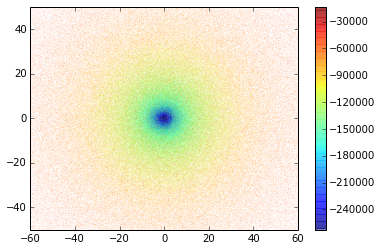

In [24]:
plt.scatter(MW_t[:,1], MW_t[:,2], s=0.1, edgecolors='none', c = MW_pot_t, alpha=0.5)
plt.axis('equal')
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fdd4e423710>

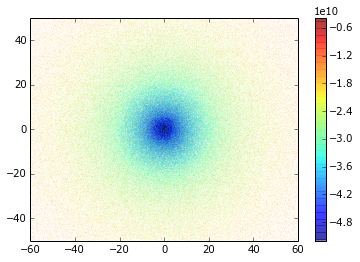

In [25]:
plt.scatter(MW_t[:,1], MW_t[:,2], s=0.1, edgecolors='none', c = MWbfe_pot, alpha=0.5)
plt.axis('equal')
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.colorbar()

In [42]:
MW_norm_pot = MW_pot_t/np.max(np.abs(MW_pot_t))
MWbfe_norm_pot1 = MWbfe_pot/np.max(np.abs(MWbfe_pot))
MWratio_pot1 = MW_norm_pot/MWbfe_norm_pot1

In [43]:
MWbfe_norm_pot2 = MWbfe_pot2/np.max(np.abs(MWbfe_pot2))
MWratio_pot2 = MW_norm_pot/MWbfe_norm_pot2

<matplotlib.colorbar.Colorbar instance at 0x7fdd476733b0>

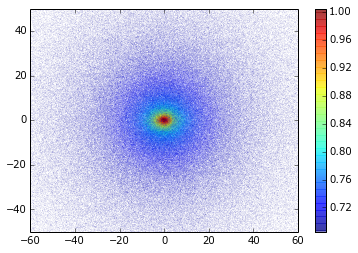

In [40]:
plt.scatter(MW_t[:,1], MW_t[:,2], s=0.1, edgecolors='none', c = MWratio_pot1, alpha=0.5)
plt.axis('equal')
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fdd4749ad88>

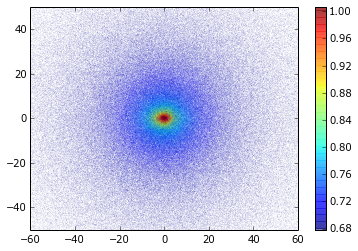

In [45]:
plt.scatter(MW_t[:,1], MW_t[:,2], s=0.1, edgecolors='none', c = MWratio_pot2, alpha=0.5)
plt.axis('equal')
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fdd3f2cf758>

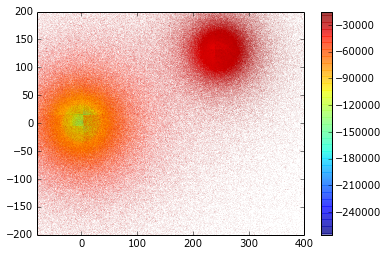

In [33]:
plt.scatter(MWLMCi_t[:,1], MWLMCi_t[:,2], s=0.1, edgecolors='none', c = MWLMCi_pot_t, alpha=0.5)
plt.axis('equal')
plt.xlim(-80, 400)
plt.ylim(-100, 100)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fdd3c925b48>

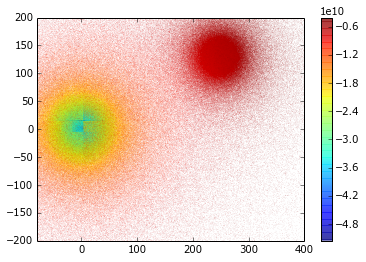

In [34]:
plt.scatter(MWLMCi_t[:,1], MWLMCi_t[:,2], s=0.1, edgecolors='none', c = MWLMCbfe_pot, alpha=0.5)
plt.axis('equal')
plt.xlim(-80, 400)
plt.ylim(-100, 100)
plt.colorbar()

In [28]:
MWLMC_norm_pot = MWLMCi_pot_t/np.max(np.abs(MWLMCi_pot_t))
MWLMCbfe_norm_pot1 = MWLMCbfe_pot/np.max(np.abs(MWLMCbfe_pot))
MWLMCratio_pot1 = MWLMC_norm_pot/MWLMCbfe_norm_pot1

<matplotlib.colorbar.Colorbar instance at 0x7fdd39c723f8>

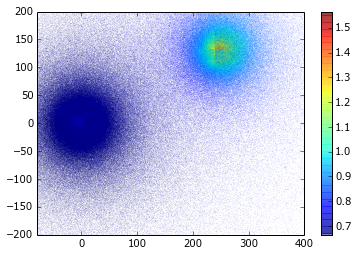

In [48]:
plt.scatter(MWLMCi_t[:,1], MWLMCi_t[:,2], s=0.1, edgecolors='none', c = MWLMCratio_pot1, alpha=0.5)
plt.axis('equal')
plt.xlim(-80, 400)
plt.ylim(-100, 100)
plt.colorbar()

In [49]:
MWLMCbfe_norm_pot2 = MWLMCbfe_pot2/np.max(np.abs(MWLMCbfe_pot2))
MWLMCratio_pot2 = MWLMC_norm_pot/MWLMCbfe_norm_pot2

<matplotlib.colorbar.Colorbar instance at 0x7fdd3737cbd8>

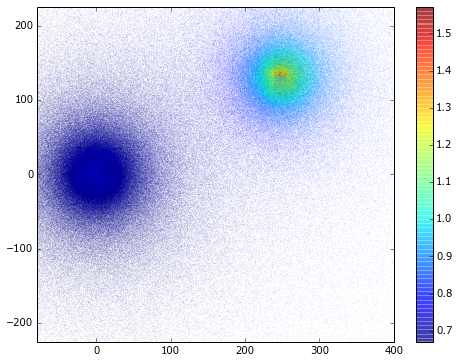

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(MWLMCi_t[:,1], MWLMCi_t[:,2], s=0.1, edgecolors='none', c = MWLMCratio_pot2, alpha=0.5)
plt.axis('equal')
plt.xlim(-80, 400)
plt.ylim(-100, 100)
plt.colorbar()

In [51]:
MWLMCbfe_norm_pot3 = MWLMCbfe_pot3/np.max(np.abs(MWLMCbfe_pot3))
MWLMCratio_pot3 = MWLMC_norm_pot/MWLMCbfe_norm_pot3

<matplotlib.colorbar.Colorbar instance at 0x7fdd55862cf8>

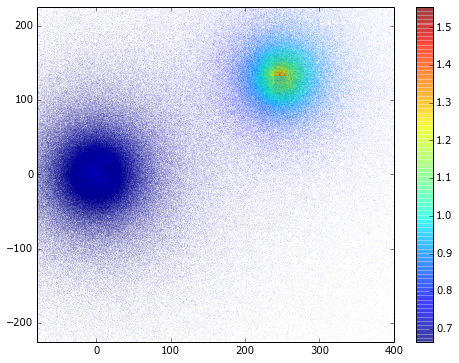

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(MWLMCi_t[:,1], MWLMCi_t[:,2], s=0.1, edgecolors='none', c = MWLMCratio_pot3, alpha=0.5)
plt.axis('equal')
plt.xlim(-80, 400)
plt.ylim(-100, 100)
plt.colorbar()

In [60]:
MWLMCbfe_norm_pot4 = MWLMCbfe_pot4/np.max(np.abs(MWLMCbfe_pot4))
MWLMCratio_pot4 = MWLMC_norm_pot/MWLMCbfe_norm_pot4

<matplotlib.colorbar.Colorbar instance at 0x7fdd474de830>

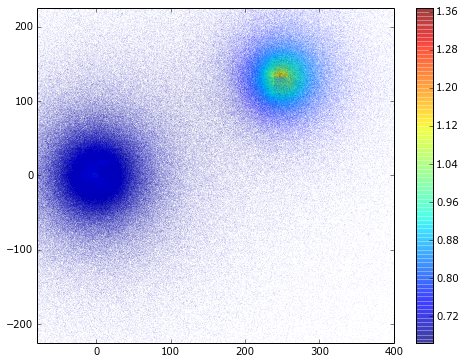

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(MWLMCi_t[:,1], MWLMCi_t[:,2], s=0.1, edgecolors='none', c = MWLMCratio_pot4, alpha=0.5)
plt.axis('equal')
plt.xlim(-80, 400)
plt.ylim(-100, 100)
plt.colorbar()

In [63]:
MWLMCbfe_norm_pot5 = MWLMCbfe_pot5/np.max(np.abs(MWLMCbfe_pot5))
MWLMCratio_pot5 = MWLMC_norm_pot/MWLMCbfe_norm_pot5

<matplotlib.colorbar.Colorbar instance at 0x7fdd5569b050>

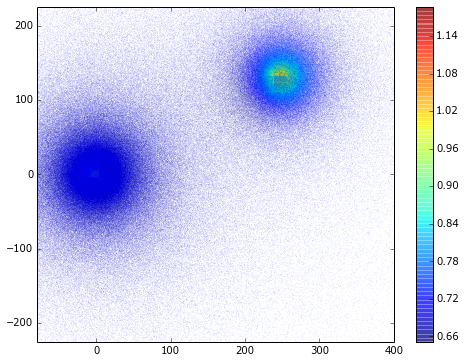

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(MWLMCi_t[:,1], MWLMCi_t[:,2], s=0.1, edgecolors='none', c = MWLMCratio_pot5, alpha=0.5)
plt.axis('equal')
plt.xlim(-80, 400)
plt.ylim(-100, 100)
plt.colorbar()

In [29]:
MWLMCbfe_norm_pot6 = MWLMCbfe_pot6/np.max(np.abs(MWLMCbfe_pot6))
MWLMCratio_pot6 = MWLMC_norm_pot/MWLMCbfe_norm_pot6

<matplotlib.colorbar.Colorbar instance at 0x7f761f7fa200>

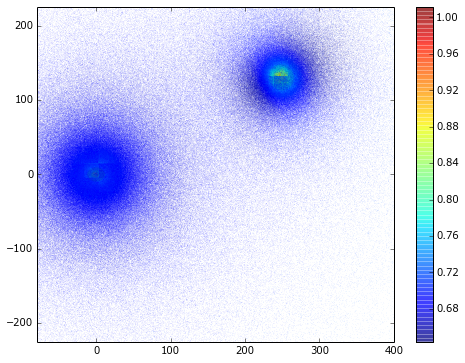

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(MWLMCi_t[:,1], MWLMCi_t[:,2], s=0.1, edgecolors='none', c = MWLMCratio_pot6, alpha=0.5)
plt.axis('equal')
plt.xlim(-80, 400)
plt.ylim(-100, 100)
plt.colorbar()

In [231]:
MWLMC_norm_potf = MWLMCf_pot_t/np.max(np.abs(MWLMCf_pot_t))
MWLMCbfe_norm_potf = MWLMCbfe_pot_f/np.max(np.abs(MWLMCbfe_pot_f))
MWLMCratio_potf = MWLMC_norm_potf/MWLMCbfe_norm_potf

In [232]:
MWLMCbfe_norm_potf2 = MWLMCbfe_pot_f2/np.max(np.abs(MWLMCbfe_pot_f2))
MWLMCratio_potf2 = MWLMC_norm_potf/MWLMCbfe_norm_potf2

MWLMCbfe_norm_potf3 = MWLMCbfe_pot_f3/np.max(np.abs(MWLMCbfe_pot_f3))
MWLMCratio_potf3 = MWLMC_norm_potf/MWLMCbfe_norm_potf3

MWLMCbfe_norm_potf4 = MWLMCbfe_pot_f4/np.max(np.abs(MWLMCbfe_pot_f4))
MWLMCratio_potf4 = MWLMC_norm_potf/MWLMCbfe_norm_potf4

<matplotlib.colorbar.Colorbar instance at 0x7f7614464a70>

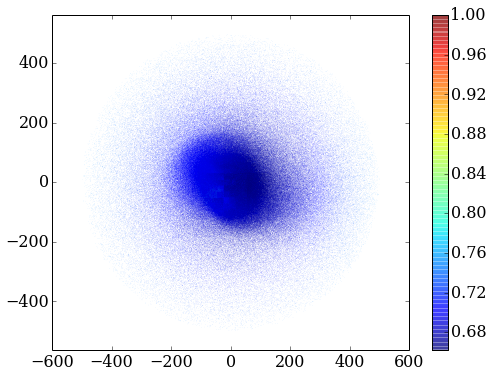

In [241]:
plt.figure(figsize=(8,6))
plt.scatter(MWLMCf_t[:,1], MWLMCf_t[:,2], s=0.1, edgecolors='none', c = (MWLMCratio_potf3), alpha=0.5)
plt.axis('equal')
#plt.xlim(-100, 100)
#plt.ylim(-100, 100)
plt.colorbar()

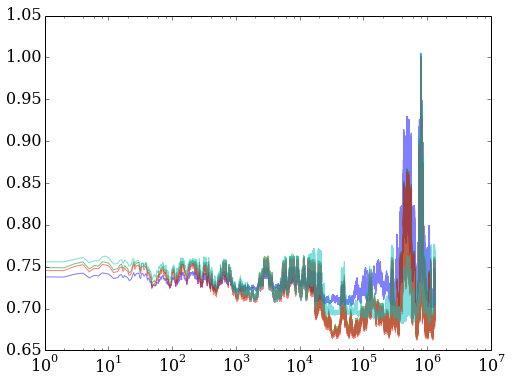

In [238]:
plt.figure(figsize=(8,6))
plt.semilogx(MWLMCratio_potf, alpha=0.5)
plt.semilogx(MWLMCratio_potf2, alpha=0.5)
plt.semilogx(MWLMCratio_potf3, alpha=0.5)
plt.semilogx(MWLMCratio_potf4, alpha=0.5)